In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

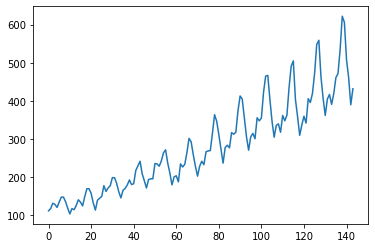

In [3]:
df['#Passengers'].plot() 

In [4]:
df['diff_shift_1'] = df['#Passengers']-df['#Passengers'].shift(1)

In [5]:
df

,Month,#Passengers,diff_shift_1
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


<AxesSubplot:>

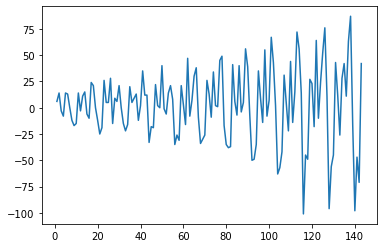

In [6]:
df['diff_shift_1'].plot()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
adfuller(df['diff_shift_1'].dropna())

(-2.8292668241699888,
 0.054213290283826945,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [9]:
def adf_test(series):
    result = adfuller(series)
    print("p_values : {}".format(result[1]))
    if result[1]<=0.05:
        print('Strong evidence againsts the null hypothesis,reject null hypothesis,indicating that data is stationary')
    else:
        print('weak evidence against null hypothesis ,indicating that the data is non-stationary')

In [10]:
adf_test(df['diff_shift_1'].dropna())

p_values : 0.054213290283826945
weak evidence against null hypothesis ,indicating that the data is non-stationary


In [11]:
df['diff_shift_2'] = df['#Passengers']-df['#Passengers'].shift(2)

In [12]:
df

,Month,#Passengers,diff_shift_1,diff_shift_2
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,NaN
2,1949-03,132,14.0,20.0
3,1949-04,129,-3.0,11.0
4,1949-05,121,-8.0,-11.0
...,...,...,...,...
139,1960-08,606,-16.0,71.0
140,1960-09,508,-98.0,-114.0
141,1960-10,461,-47.0,-145.0
142,1960-11,390,-71.0,-118.0


<AxesSubplot:>

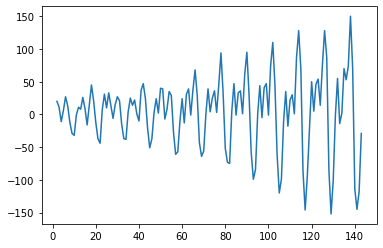

In [13]:
df['diff_shift_2'].plot()

In [14]:
adf_test(df['diff_shift_2'].dropna())

p_values : 0.03862975767698791
Strong evidence againsts the null hypothesis,reject null hypothesis,indicating that data is stationary


In [15]:
from statsmodels.tsa.ar_model import AutoReg

In [16]:
dff= df['diff_shift_2'].dropna()
dff.shape

(142,)

In [17]:
train = dff[:len(dff)-7]

In [18]:
train.shape

(135,)

In [19]:
test = dff[len(dff)-7:]

In [20]:
test.shape

(7,)

In [21]:
test

137     74.0
138    150.0
139     71.0
140   -114.0
141   -145.0
142   -118.0
143    -29.0
Name: diff_shift_2, dtype: float64

In [60]:
model = AutoReg(df['diff_shift_2'].dropna(),lags=1).fit()

C:\Users\User15\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
pred = model.predict(start =136,end=142)

C:\Users\User15\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
len(dff)-1

141

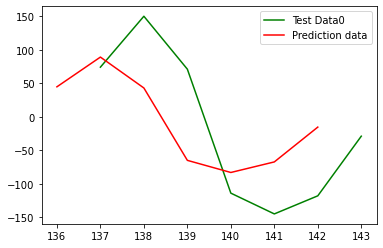

In [63]:
plt.plot(test,label='Test Data0',color='g')
plt.plot(pred,label='Prediction data',color='r')
plt.legend()

In [64]:
from sklearn.metrics import mean_squared_error 

In [65]:
pred.shape

(7,)

In [66]:
rmse = np.sqrt(mean_squared_error(test,pred))

In [67]:
rmse

45.23437643176114